# Importing

## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.2 M

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pycaret.time_series import TSForecastingExperiment

## Dataset

In [ ]:
# Replace 'path_to_your_csv_file' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Trails/NVDA 1.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check if it's loaded correctly
print(data.head())


         Date     Open     High      Low    Close  Adj Close     Volume
0  2012-11-20  0.28950  0.29075  0.28425  0.28725   0.265173  336976000
1  2012-11-21  0.28725  0.29625  0.28700  0.29550   0.272789  422312000
2  2012-11-23  0.29675  0.30100  0.29525  0.29750   0.274636  276932000
3  2012-11-26  0.29800  0.30350  0.29750  0.30275   0.279482  364600000
4  2012-11-27  0.30150  0.30850  0.29900  0.30400   0.280636  451404000


In [ ]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
2910  2024-06-14  129.960007  132.839996  128.320007  131.880005  131.880005   
2911  2024-06-17  132.990005  133.729996  129.580002  130.979996  130.979996   
2912  2024-06-18  131.139999  136.330002  130.690002  135.580002  135.580002   
2913  2024-06-20  139.800003  140.759995  129.520004  130.779999  130.779999   
2914  2024-06-21  127.120003  130.630005  124.300003  126.570000  126.570000   

         Volume  
2910  309320400  
2911  288504400  
2912  294335100  
2913  517768400  
2914  649445800

# About Data

In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2915 non-null   object 
 1   Open       2915 non-null   float64
 2   High       2915 non-null   float64
 3   Low        2915 non-null   float64
 4   Close      2915 non-null   float64
 5   Adj Close  2915 non-null   float64
 6   Volume     2915 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB


In [ ]:
# Display summary statistics of the dataset
data.describe()

Open         High          Low        Close    Adj Close  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean     12.203867    12.424575    11.971037    12.212220    12.184745   
std      19.324402    19.672322    18.933069    19.333715    19.338275   
min       0.287250     0.290750     0.284250     0.287250     0.265173   
25%       0.646500     0.657000     0.633500     0.647125     0.630227   
50%       4.743000     4.817500     4.659750     4.738500     4.698981   
75%      15.091000    15.345750    14.817875    15.112000    15.095000   
max     139.800003   140.759995   130.690002   135.580002   135.580002   

             Volume  
count  2.915000e+03  
mean   4.499863e+08  
std    2.473682e+08  
min    4.564400e+07  
25%    2.912780e+08  
50%    3.978650e+08  
75%    5.422780e+08  
max    3.692928e+09

In [ ]:
# Check for missing value
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Exploratory Data Analysis


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with titles
fig = make_subplots(
    rows=6,
    cols=1,
    shared_xaxes=False,
    vertical_spacing=0.05,
    subplot_titles=('Open Price', 'High Price', 'Low Price', 'Close Price', 'Adjusted Close Price', 'Volume')  # Titles for each subplot
)

# Add traces for each attribute in the DataFrame
fig.add_trace(go.Scatter(x=data.index, y=data['Open'], name='Open'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['High'], name='High'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Low'], name='Low'), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close'), row=4, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], name='Adj Close'), row=5, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Volume'], name='Volume', mode='lines'), row=6, col=1)

# Update layout
fig.update_layout(
    height=1200,
    width=1000,
    title_text="NVIDIA Stock Attributes",
    showlegend=True
)

# Optionally, adjust the layout of subplot titles if needed
fig.update_annotations(font_size=12)  # Adjust the font size of subplot titles

# Show the figure
fig.show()


In [ ]:
# Select only the 'Date' and 'Adj Close' columns
nvidia_data = data[['Date', 'Adj Close']].copy()

# Parse the dates and set the 'Date' column as the index
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True)

# Display the first few rows to verify changes
print(nvidia_data.head())

            Adj Close
Date                 
2012-11-20   0.265173
2012-11-21   0.272789
2012-11-23   0.274636
2012-11-26   0.279482
2012-11-27   0.280636


In [ ]:
nvidia_data.tail()

Adj Close   Returns  log_Close  log_diff_Close
Date                                                       
2024-06-14  131.880005  0.017514   4.881892        0.017363
2024-06-17  130.979996 -0.006824   4.875045       -0.006848
2024-06-18  135.580002  0.035120   4.909562        0.034517
2024-06-20  130.779999 -0.035403   4.873517       -0.036045
2024-06-21  126.570000 -0.032191   4.840796       -0.032721

In [ ]:
# Create an interactive plot using Plotly
fig = px.line(nvidia_data, x=nvidia_data.index, y='Adj Close', title='NVIDIA Stock Price')

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close Price',
    legend_title_text='Stock Price',
    template='ggplot2'
)

# Show the plot
fig.show()

The plot shows a clear upward trend in NVIDIA's stock price over the period.
The stock price remained relatively low and stable until around 2016.
After 2016, there is a noticeable increase in stock price, especially pronounced from 2020 onwards.

The stock price experienced fluctuations and volatility, particularly visible after 2020.
Sharp rises and falls are observed, indicating periods of high volatility.

The most significant increase in stock price appears to have occurred in the last couple of years, with a steep rise observed around 2023-2024.

## Volume

In [ ]:
import seaborn as sns
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

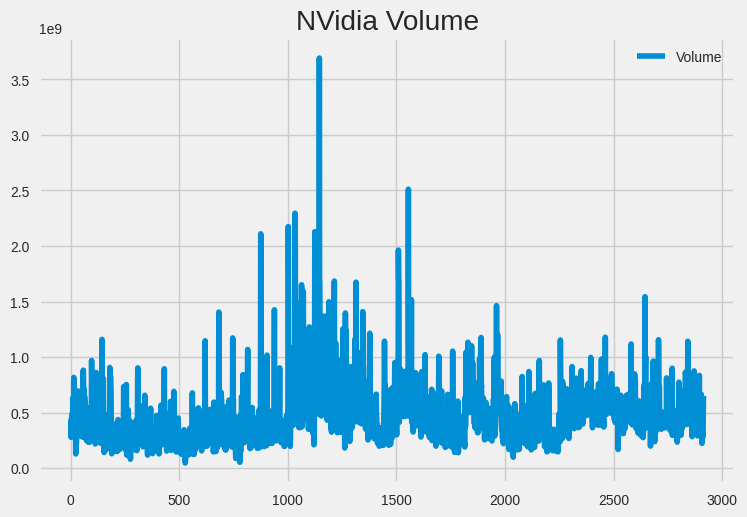

In [ ]:
Volume_data = data[['Date', 'Volume']].copy()
Volume_data.plot()
plt.title('NVidia Volume')
plt.show()

In [ ]:
Volume_data['Date'] = pd.to_datetime(data.Date)
Volume_data = Volume_data.set_index('Date')
Volume_data['year'] = Volume_data.index.year
Volume_data['month'] = Volume_data.index.month
Volume_data['day'] = Volume_data.index.day

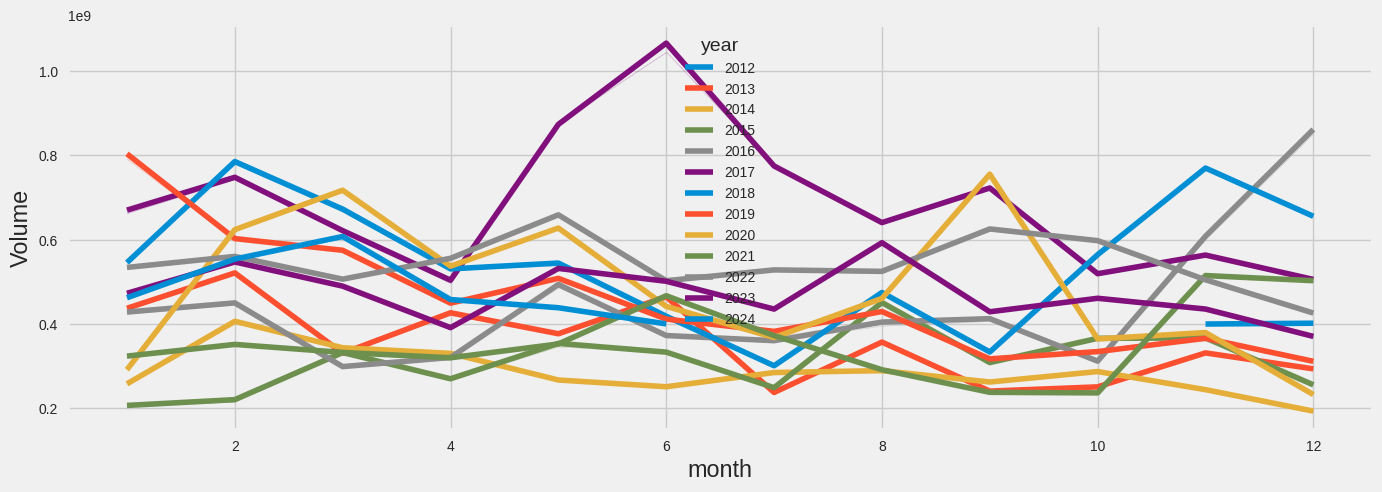

In [ ]:
plt.subplots(figsize=(15, 5))
sns.lineplot(data=Volume_data, x='month', y='Volume', hue='year',palette=color_pal, ci=False)
plt.show()

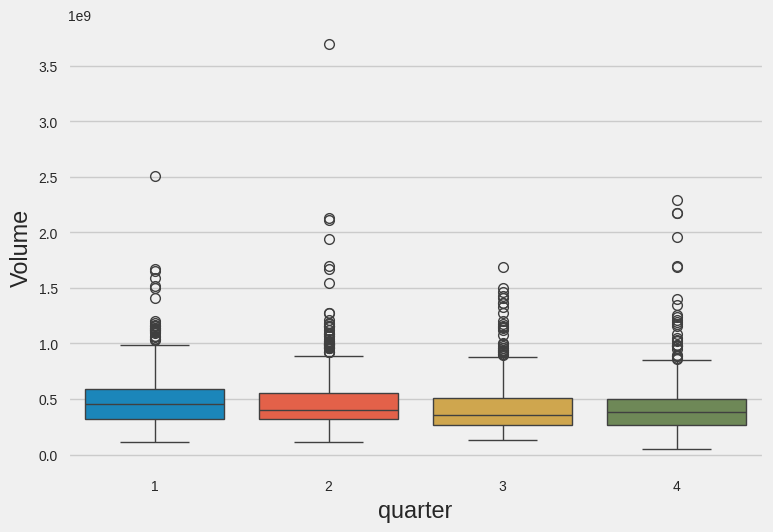

In [ ]:
Volume_data['quarter'] = Volume_data.index.quarter
sns.boxplot(data=Volume_data, x='quarter', y='Volume',palette=color_pal)
plt.show()

In [ ]:
res = adfuller(Volume_data.Volume)
if res[1] < 0.05:
  print('The data of {} is stationary series'.format(Volume_data.Volume.name))
else:
  print('The data of {} is not stationary series'.format(Volume_data.Volume.name))

The data of Volume is stationary series


## Returns

In [ ]:
# Calculate daily returns
nvidia_data['Returns'] = nvidia_data['Adj Close'].pct_change()

# Prepare the data for plotting
dates = nvidia_data.index
returns = nvidia_data['Returns']

# Create the figure
fig = go.Figure()

# Add the patches for specific return thresholds
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0.3, y1=0,
              fillcolor="rgba(51, 204, 51, 0.3)", line=dict(color="rgba(51, 204, 51, 0.3)"))
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0, y1=-0.2,
              fillcolor="rgba(204, 51, 51, 0.3)", line=dict(color="rgba(204, 51, 51, 0.3)"))

# Add the line plot for returns
fig.add_trace(go.Scatter(x=dates[1:], y=returns[1:], mode='lines', name='Daily Returns'))

# Update the layout of the plot
fig.update_layout(
    title="Nvidia Stock Daily Returns",
    xaxis_title="Date",
    yaxis_title="Returns",
    font=dict(size=20),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    width=1800,
    height=600
)

# Show the plot
fig.show()


In [ ]:
# Calculate metrics
mean_return = nvidia_data['Returns'].mean()
volatility = nvidia_data['Returns'].std()
skewness = nvidia_data['Returns'].skew()
kurtosis = nvidia_data['Returns'].kurtosis()
risk_free_rate = 0.01 / 252
sharpe_ratio = (mean_return - risk_free_rate) / volatility
rolling_max = nvidia_data['Adj Close'].cummax()
daily_drawdown = nvidia_data['Adj Close'] / rolling_max - 1.0
max_drawdown = daily_drawdown.cummin().min()
confidence_level = 0.05
VaR = np.percentile(nvidia_data['Returns'].dropna(), confidence_level*100)
CVaR = nvidia_data['Returns'][nvidia_data['Returns'] <= VaR].mean()

# Display metrics
print(f"Mean Return: {mean_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.4f}")
print(f"Value at Risk (VaR) at 5% confidence level: {VaR:.4f}")
print(f"Conditional Value at Risk (CVaR) at 5% confidence level: {CVaR:.4f}")

Mean Return: 0.0025
Volatility: 0.0283
Skewness: 0.7198
Kurtosis: 10.1977
Sharpe Ratio: 0.0875
Max Drawdown: -0.6634
Value at Risk (VaR) at 5% confidence level: -0.0405
Conditional Value at Risk (CVaR) at 5% confidence level: -0.0603


## Decomposition

In [ ]:
# Set the period for STL decomposition (adjust based on your data)
period = 252  # For yearly seasonality in daily stock data

# Perform STL decomposition
stl = STL(nvidia_data['Adj Close'], period=period)
result = stl.fit()

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
season_adjust = trend + residual

# Create a DataFrame to hold the components and other relevant columns
components_df = pd.DataFrame({
    'Date': nvidia_data.index,
    'Adj Close': nvidia_data['Adj Close'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual,
    'Seasonally Adjusted': season_adjust
})

# Adding a column for the model name
components_df['Model'] = 'STL'

# Rearrange columns to match the desired format
components_df = components_df[['Model', 'Date', 'Adj Close', 'Trend', 'Seasonal', 'Residual', 'Seasonally Adjusted']]


In [ ]:
# Print the components DataFrame
components_df

Model       Date   Adj Close      Trend   Seasonal   Residual  \
Date                                                                       
2012-11-20   STL 2012-11-20    0.265173   0.254753  -0.027693   0.038113   
2012-11-21   STL 2012-11-21    0.272789   0.255243  -0.020859   0.038404   
2012-11-23   STL 2012-11-23    0.274636   0.255734  -0.023072   0.041974   
2012-11-26   STL 2012-11-26    0.279482   0.256224  -0.013936   0.037194   
2012-11-27   STL 2012-11-27    0.280636   0.256715  -0.006761   0.030682   
...          ...        ...         ...        ...        ...        ...   
2024-06-14   STL 2024-06-14  131.880005  91.438932  28.992735  11.448338   
2024-06-17   STL 2024-06-17  130.979996  91.672006  28.109307  11.198684   
2024-06-18   STL 2024-06-18  135.580002  91.905174  30.926024  12.748805   
2024-06-20   STL 2024-06-20  130.779999  92.138435  27.954535  10.687028   
2024-06-21   STL 2024-06-21  126.570000  92.371790  24.855291   9.342919   

            Seasonally Adjusted  
Date                             
2012-11-20             0.292866  
2012-11-21             0.293648  
2012-11-23             0.297708  
2012-11-26             0.293418  
2012-11-27             0.287397  
...                         ...  
2024-06-14           102.887270  
2024-06-17           102.870689  
2024-06-18           104.653978  
2024-06-20           102.825464  
2024-06-21           101.714709  

[2915 rows x 7 columns]

In [ ]:
# Create a figure with subplots
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02,  # Space between the plots
                    subplot_titles=('Trend', 'Seasonality', 'Residuals'))

# Trend subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=trend, name='Trend'),
    row=1, col=1
)

# Seasonality subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=seasonal, name='Seasonality'),
    row=2, col=1
)

# Residuals subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=residual, name='Residuals'),
    row=3, col=1
)

# Update layout
fig.update_layout(height=800, width=1000,
                  title_text="Decomposition of NVIDIA Stock Data",
                  showlegend=False)

# Show the figure
fig.show()

## Rolling Statistics

In [ ]:
# Handle missing values
nvidia_data = nvidia_data.interpolate()

def plot_rolling_statistics(series, window=12):
    # Calculate rolling mean and standard deviation
    rolmean = series.rolling(window=window).mean()
    rolstd = series.rolling(window=window).std()

    # Create a Plotly graph object
    fig = go.Figure()

    # Add the original series to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=series,
        mode='lines',
        name='Original',
        line=dict(color='blue')
    ))

    # Add the rolling mean to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolmean,
        mode='lines',
        name='Rolling Mean',
        line=dict(color='red')
    ))

    # Add the rolling standard deviation to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolstd,
        mode='lines',
        name='Rolling Std',
        line=dict(color='black')
    ))

    # Update plot layout
    fig.update_layout(
        title='Rolling Mean & Standard Deviation',
        xaxis_title='Date',
        yaxis_title='Value',
        width=800,  # Adjust width
        height=400   # Adjust height
    )

    # Show the figure
    fig.show()


# Original Series
plot_rolling_statistics(nvidia_data['Adj Close'])

## Stationarity Tests

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

# Original series
print("ADF Test on Original Series:")
adf_test(nvidia_data['Adj Close'])

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
Critical Value (1%): -3.432617102137327
Critical Value (5%): -2.8625416527115592
Critical Value (10%): -2.567303208514837


### Transformation

In [ ]:
# Log Transformation
nvidia_data['log_Close'] = np.log(nvidia_data['Adj Close'])
plot_rolling_statistics(nvidia_data['log_Close'])

In [ ]:
# Log Transformation
print("ADF Test on Log Transformed Series:")
adf_test(nvidia_data['log_Close'])

ADF Test on Log Transformed Series:
ADF Statistic: 0.5932017973202582
p-value: 0.9874468610192699
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


In [ ]:
# Log Differencing
nvidia_data['log_diff_Close'] = nvidia_data['log_Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['log_diff_Close'])

In [ ]:
# It's a good practice to check and remove any infinite values which can result from improper data handling
nvidia_data['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data['log_diff_Close'].dropna(inplace=True)

In [ ]:
# Log Differencing
nvidia_data['log_diff_Close'] = nvidia_data['log_Close'].diff().dropna()
print("ADF Test on Log Differenced Series:")
adf_test(nvidia_data['log_diff_Close'])


ADF Test on Log Differenced Series:
ADF Statistic: -19.0951709457048
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


Trend Removal: The rolling mean is stable around zero, indicating the trend has been successfully removed.

Variance Stabilization: The rolling standard deviation is stable, indicating that the variance is now more consistent over time.

These observations suggest that the log-differencing transformation has successfully made the series stationary.

Given that our data shows both a strong trend and increasing variance, it would be beneficial to apply both log transformation and differencing. This combined approach will help us stabilize the variance and remove the trend, making the series more stationary.

In [ ]:
nvidia_data

Adj Close   Returns  log_Close  log_diff_Close
Date                                                       
2012-11-20    0.265173       NaN  -1.327373             NaN
2012-11-21    0.272789  0.028721  -1.299057        0.028316
2012-11-23    0.274636  0.006771  -1.292309        0.006748
2012-11-26    0.279482  0.017645  -1.274817        0.017491
2012-11-27    0.280636  0.004129  -1.270697        0.004121
...                ...       ...        ...             ...
2024-06-14  131.880005  0.017514   4.881892        0.017363
2024-06-17  130.979996 -0.006824   4.875045       -0.006848
2024-06-18  135.580002  0.035120   4.909562        0.034517
2024-06-20  130.779999 -0.035403   4.873517       -0.036045
2024-06-21  126.570000 -0.032191   4.840796       -0.032721

[2915 rows x 4 columns]

## TSForecastingExperiment

In [ ]:
from pycaret.time_series import TSForecastingExperiment

Pre-processing Data:
Since, in the historical data we have loaded, data is not available for non-trading days, and PyCaret doesn't support modeling for daily data with missing values, we will generate a synthetic sequence of new date column starting from the first start date.

In [ ]:
# Load your NVIDIA stock data
nvidia_data_exp = data

# Verify index and columns
print(nvidia_data_exp.index)  # This should print the DateTime index

RangeIndex(start=0, stop=2915, step=1)


In [ ]:
# Ensure 'AdjClose' and 'Log_diff_close' are included for forecasting
nvidia_data_exp = nvidia_data_exp[['Date','Adj Close']]

In [ ]:
nvidia_data_exp

Date   Adj Close
0     2012-11-20    0.265173
1     2012-11-21    0.272789
2     2012-11-23    0.274636
3     2012-11-26    0.279482
4     2012-11-27    0.280636
...          ...         ...
2910  2024-06-14  131.880005
2911  2024-06-17  130.979996
2912  2024-06-18  135.580002
2913  2024-06-20  130.779999
2914  2024-06-21  126.570000

[2915 rows x 2 columns]

In [ ]:
from datetime import date, timedelta

sdate = [int(i) for i in nvidia_data_exp.Date.min().split("-")] # start date

sdate = date(sdate[0], sdate[1], sdate[2])

edate = [int(i) for i in nvidia_data_exp.Date.max().split("-")] # end date

edate = date(edate[0], edate[1], edate[2])

In [ ]:
nvidia_data_exp['Index_Date'] = pd.date_range(sdate,edate-timedelta(days=1),freq='d')[:nvidia_data_exp.shape[0]]

nvidia_data_exp.index = pd.PeriodIndex(nvidia_data_exp.Index_Date, freq='D')

nvidia_data_exp = nvidia_data_exp.drop("Index_Date", axis=1)

nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close'].astype(float)

nvidia_data_exp.sort_index(ascending=True, inplace=True)

In [ ]:
nvidia_data_exp.head()

Date  Adj Close
Index_Date                       
2012-11-20  2012-11-20   0.265173
2012-11-21  2012-11-21   0.272789
2012-11-22  2012-11-23   0.274636
2012-11-23  2012-11-26   0.279482
2012-11-24  2012-11-27   0.280636

In [ ]:
forecast_horizon = 60
# Setup experiment on original data
exp = TSForecastingExperiment()
exp.setup(data=nvidia_data_exp['Adj Close'], session_id=171, fh=forecast_horizon)

# Plot diagnostics, ACF, and PACF for the original data
exp.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})
exp.plot_model(plot="acf")
exp.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})


In [ ]:
exp.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting          Value  
0                                    2915.0  
1                                       0.0  
2                                 12.184745  
3                                  4.698981  
4                                 19.338275  
5                                 373.96889  
6                                  10.32273  
7                                   2.95705  
8                                    2767.0  
9   {'alpha': 0.05, 'K': 24}    59214.83499  
10  {'alpha': 0.05, 'K': 48}  105236.912091  
11  {'alpha': 0.05, 'K': 24}            0.0  
12  {'alpha': 0.05, 'K': 48}            0.0  
13  {'alpha': 0.05, 'K': 24}            0.0  
14  {'alpha': 0.05, 'K': 48}            0.0  
15           {'alpha': 0.05}          False  
16           {'alpha': 0.05}            1.0  
17           {'alpha': 0.05}       5.872963  
18           {'alpha': 0.05}      -3.432617  
19           {'alpha': 0.05}      -2.862542  
20           {'alpha': 0.05}      -2.567303  
21           {'alpha': 0.05}          False  
22           {'alpha': 0.05}           0.01  
23           {'alpha': 0.05}       1.099928  
24           {'alpha': 0.05}          0.119  
25           {'alpha': 0.05}          0.146  
26           {'alpha': 0.05}          0.176  
27           {'alpha': 0.05}          0.216  
28           {'alpha': 0.05}          False  
29           {'alpha': 0.05}            0.0

In [ ]:
# Log Transformation
nvidia_data_exp['log_Close'] = np.log(nvidia_data_exp['Adj Close'])

# Log Differencing
nvidia_data_exp['log_diff_Close'] = nvidia_data_exp['log_Close'].diff().dropna()

# It's a good practice to check and remove any infinite values which can result from improper data handling
nvidia_data_exp['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data_exp['log_diff_Close'].dropna(inplace=True)

In [ ]:
forecast_horizon = 60
# Setup experiment on original data
exp_diff = TSForecastingExperiment()
exp_diff.setup(data=nvidia_data_exp['log_diff_Close'].dropna(), session_id=171, fh=forecast_horizon)

In [ ]:
# Plot diagnostics, ACF, and PACF for the transformed data
exp_diff.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})
exp_diff.plot_model(plot="acf")
exp_diff.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})


In [ ]:
exp_diff.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                 2914.0  
1                                    0.0  
2                               0.002117  
3                               0.002105  
4                               0.028023  
5                               0.000785  
6                               8.428835  
7                               0.266275  
8                                 2897.0  
9   {'alpha': 0.05, 'K': 24}   68.688204  
10  {'alpha': 0.05, 'K': 48}  100.013113  
11  {'alpha': 0.05, 'K': 24}    0.000003  
12  {'alpha': 0.05, 'K': 48}    0.000016  
13  {'alpha': 0.05, 'K': 24}         0.0  
14  {'alpha': 0.05, 'K': 48}         0.0  
15           {'alpha': 0.05}        True  
16           {'alpha': 0.05}         0.0  
17           {'alpha': 0.05}  -19.095171  
18           {'alpha': 0.05}   -3.432602  
19           {'alpha': 0.05}   -2.862535  
20           {'alpha': 0.05}     -2.5673  
21           {'alpha': 0.05}        True  
22           {'alpha': 0.05}         0.1  
23           {'alpha': 0.05}    0.091304  
24           {'alpha': 0.05}       0.119  
25           {'alpha': 0.05}       0.146  
26           {'alpha': 0.05}       0.176  
27           {'alpha': 0.05}       0.216  
28           {'alpha': 0.05}       False  
29           {'alpha': 0.05}         0.0

# Model comparision

In [ ]:
models_to_compare = ['arima', 'ets','exp_smooth','auto_arima']

# Compare selected models
best_model = exp_diff.compare_models(include=models_to_compare)

Processing:   0%|          | 0/21 [00:00<?, ?it/s]

## Auto ARIMA

Using Auto Arima to get the best Parameters

In [ ]:
nvidia_data

Adj Close   Returns  log_Close  log_diff_Close
Date                                                       
2012-11-20    0.265173       NaN  -1.327373             NaN
2012-11-21    0.272789  0.028721  -1.299057        0.028316
2012-11-23    0.274636  0.006771  -1.292309        0.006748
2012-11-26    0.279482  0.017645  -1.274817        0.017491
2012-11-27    0.280636  0.004129  -1.270697        0.004121
...                ...       ...        ...             ...
2024-06-14  131.880005  0.017514   4.881892        0.017363
2024-06-17  130.979996 -0.006824   4.875045       -0.006848
2024-06-18  135.580002  0.035120   4.909562        0.034517
2024-06-20  130.779999 -0.035403   4.873517       -0.036045
2024-06-21  126.570000 -0.032191   4.840796       -0.032721

[2915 rows x 4 columns]

In [ ]:
test_arima = auto_arima(nvidia_data['log_diff_Close'].dropna())
print(test_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2914
Model:               SARIMAX(1, 0, 0)   Log Likelihood                6287.799
Date:                Thu, 27 Jun 2024   AIC                         -12569.598
Time:                        17:55:21   BIC                         -12551.666
Sample:                             0   HQIC                        -12563.138
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.001      4.300      0.000       0.001       0.003
ar.L1         -0.0602      0.012     -4.934      0.000      -0.084      -0.036
sigma2         0.0008   9.18e-06     85.194      0.0

In [ ]:
test_arima = auto_arima(nvidia_data['log_diff_Close'].dropna(),
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=5, max_q=5,  # Maximum p and q
                        seasonal=True,  # No seasonality for this example
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Display the summary of the model
print(test_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12561.012, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12569.598, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12569.254, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12546.427, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12568.218, Time=1.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12568.098, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12566.242, Time=1.45 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12552.998, Time=0.24 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.803 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2914
Model:               SARIMAX(1, 0, 0)   Log Likelihood                6287.799
Date:                Thu, 27 Jun 2024   AIC                         -12569.598
Time:               

## Fitting the Model

In [ ]:
fit_data = pd.DataFrame(nvidia_data['log_diff_Close'])
fit_data

log_diff_Close
Date                      
2012-11-20             NaN
2012-11-21        0.028316
2012-11-23        0.006748
2012-11-26        0.017491
2012-11-27        0.004121
...                    ...
2024-06-14        0.017363
2024-06-17       -0.006848
2024-06-18        0.034517
2024-06-20       -0.036045
2024-06-21       -0.032721

[2915 rows x 1 columns]

In [ ]:
# Define the number of data points to use for training
n_train = len(fit_data) - 60  # Use all data except the last 60 for training

# Split the data into training and testing sets
train = fit_data.iloc[:n_train]
test = fit_data.iloc[n_train:]  # This ensures the last 60 points are used for testing

print(f"Training data range: {train.index.min()} to {train.index.max()}")
print(f"Testing data range: {test.index.min()} to {test.index.max()}")

Training data range: 2012-11-20 00:00:00 to 2024-03-26 00:00:00
Testing data range: 2024-03-27 00:00:00 to 2024-06-21 00:00:00


In [ ]:
train.shape

(2855, 1)

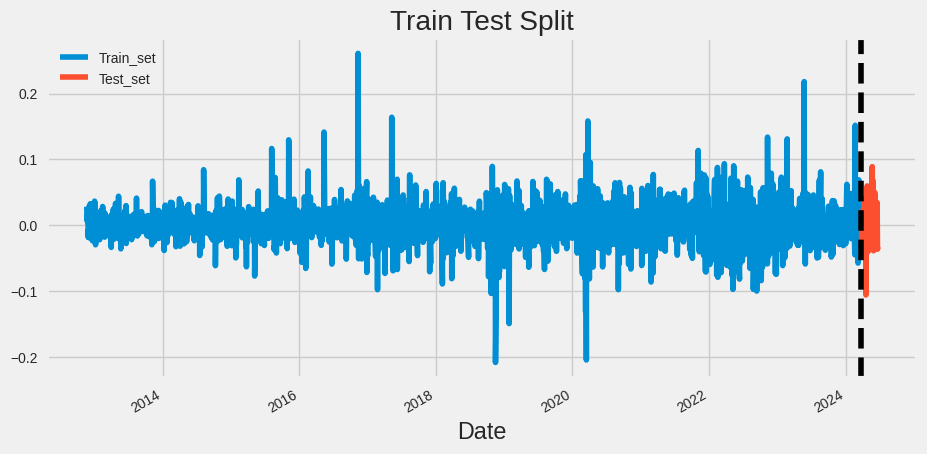

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline('2024-03-26', color ='Black', ls='--')
plt.legend(['Train_set', 'Test_set'])
plt.title('Train Test Split')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['log_diff_Close'], order=(1, 0, 0))
fitted_model = model.fit()

# Print out the summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:         log_diff_Close   No. Observations:                 2855
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6168.513
Date:                Thu, 27 Jun 2024   AIC                         -12331.025
Time:                        18:34:28   BIC                         -12313.155
Sample:                             0   HQIC                        -12324.581
                               - 2855                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      4.141      0.000       0.001       0.003
ar.L1         -0.0619      0.012     -5.075      0.000      -0.086      -0.038
sigma2         0.0008   9.11e-06     85.292      0.0

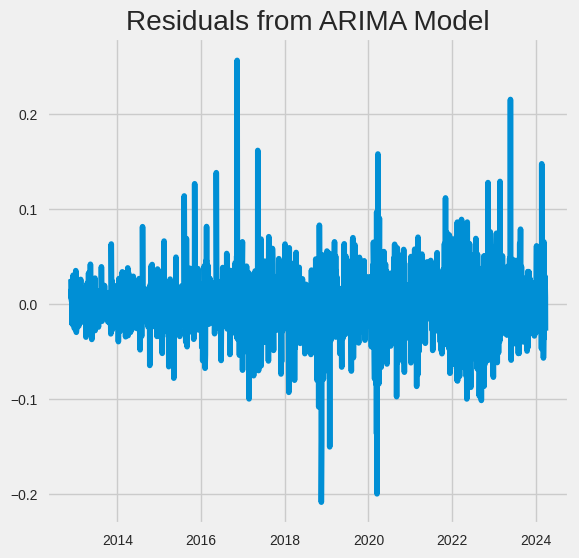

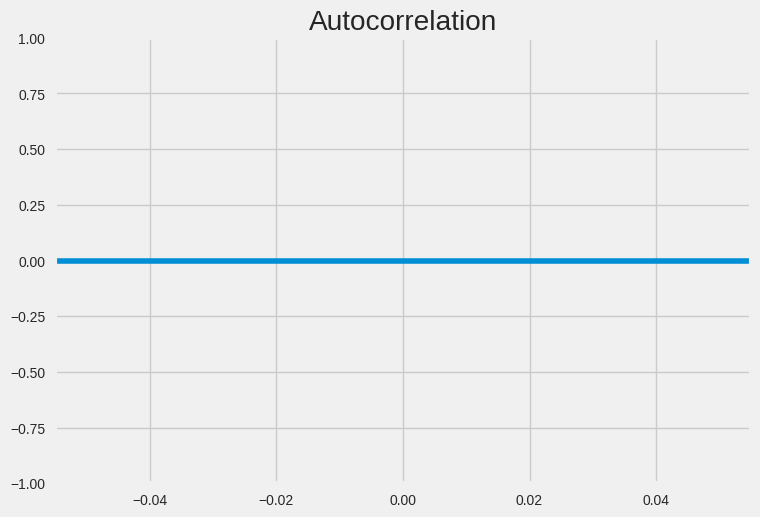

In [ ]:
# Plot the residuals
residuals = fitted_model.resid
plt.figure(figsize=(6, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Check for remaining autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=30)
plt.show()


log_diff_Close      mean   mean_se  mean_ci_lower  mean_ci_upper
2855            0.003789  0.027867      -0.050829       0.058408
2856            0.001944  0.027921      -0.052780       0.056667
2857            0.002058  0.027921      -0.052666       0.056782
2858            0.002051  0.027921      -0.052673       0.056774
2859            0.002051  0.027921      -0.052672       0.056775
2860            0.002051  0.027921      -0.052673       0.056775
2861            0.002051  0.027921      -0.052673       0.056775
2862            0.002051  0.027921      -0.052673       0.056775
2863            0.002051  0.027921      -0.052673       0.056775
2864            0.002051  0.027921      -0.052673       0.056775
2865            0.002051  0.027921      -0.052673       0.056775
2866            0.002051  0.027921      -0.052673       0.056775
2867            0.002051  0.027921      -0.052673       0.056775
2868            0.002051  0.027921      -0.052673       0.056775
2869            0.002051 

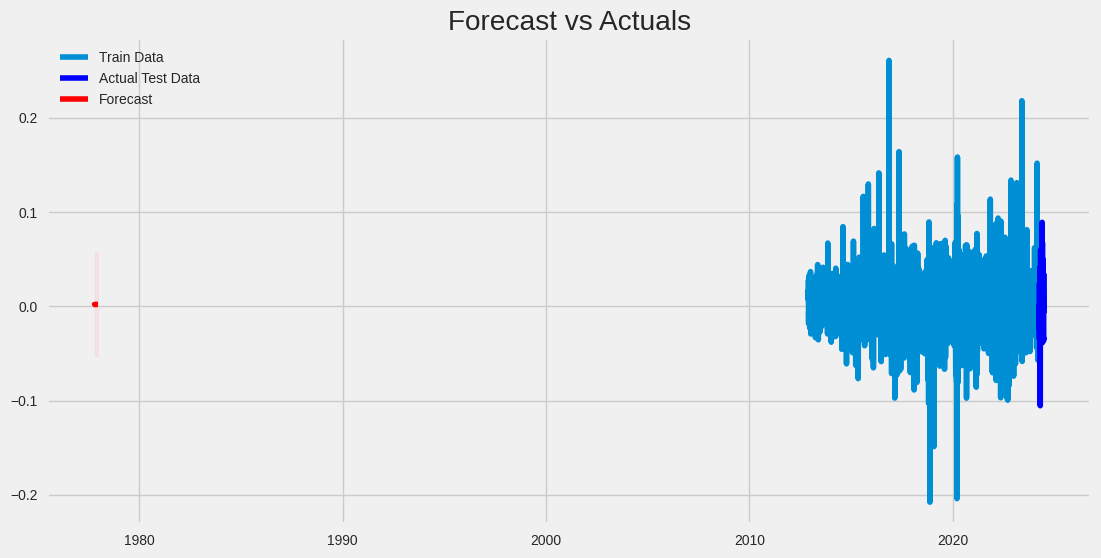

In [ ]:
forecast_horizon = len(test)
forecast = fitted_model.get_forecast(steps=forecast_horizon)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

print(forecast.summary_frame())

# Plotting the forecast and the actual data
plt.figure(figsize=(12, 6))
plt.plot(train['log_diff_Close'], label='Train Data')  # Ensure this is your training set
plt.plot(test['log_diff_Close'], label='Actual Test Data', color='blue')  # Ensure this is your test set

# Ensure 'mean_forecast' is correctly computed and indexed
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# If 'mean_forecast' is a Series, directly plotting it should work
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Plotting the confidence intervals
# Ensure 'confidence_intervals' contains two columns for lower and upper bounds
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],  # Lower bound
                 confidence_intervals.iloc[:, 1],  # Upper bound
                 color='pink', alpha=0.3)

plt.title('Forecast vs Actuals')
plt.legend()
plt.show()


## Cross-checking transformation

First Differencing (diff_1):

The first differencing plot shows variability around a mean close to zero, which suggests that the first differencing has helped in making the series mean-stationary.
The rolling mean is quite stable and fluctuates narrowly around zero, indicating effective removal of any trend in the data.
The rolling standard deviation is also relatively stable, although there are some peaks, which suggests that while the data's variance is mostly constant, there may be periods of increased volatility.

In [ ]:
nvidia_data['ldiff_1'] = nvidia_data['log_Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['ldiff_1'])

Second Differencing (diff_2):

The second differencing plot shows that the variability remains, with more pronounced spikes in the rolling standard deviation. This could indicate that the second differencing has introduced some noise or exaggerated the variability in the data.
Similar to the first differencing, the rolling mean stays around zero, indicating no apparent trend. However, the mean does not show a significant improvement over the first differencing.
The fluctuations in the rolling standard deviation are slightly more pronounced compared to the first differencing, suggesting possible over-differencing.

In [ ]:
nvidia_data['ldiff_2'] = nvidia_data['ldiff_1'].diff().dropna()
plot_rolling_statistics(nvidia_data['ldiff_2'])

Over-differencing a time series can lead to a loss of important information and increase the noise in the data. The second differencing may be causing this, as indicated by the increased fluctuations in the rolling standard deviation.

Without Log transform

First Differencing (diff_1):

The rolling mean is stable and very close to zero across the entire timeframe, which is a strong indicator that differencing has effectively removed any trend in the data.
The rolling standard deviation, while relatively stable, shows spikes particularly towards the end of the series. This suggests that while the trend may be removed, there may be periods of increased volatility or heteroscedasticity (non-constant variance).

In [ ]:
nvidia_data['diff_1'] = nvidia_data['Adj Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['diff_1'])

Second Differencing (diff_2):

Similar to the first differencing, the rolling mean remains stable and near zero, reaffirming the removal of trends.
The rolling standard deviation shows more pronounced spikes than in the first differencing. This indicates that while the mean stationarity is maintained, the volatility or variance fluctuations might be exacerbated by the second differencing.

In [ ]:
nvidia_data['diff_2'] = nvidia_data['diff_1'].diff().dropna()
plot_rolling_statistics(nvidia_data['diff_2'])

**Need for Log Transformation:**

Log transformation is primarily used to stabilize the variance across a time series, particularly in cases where the variance grows or shrinks with the level of the series (common in financial time series). The stability of the rolling mean suggests that trend stationarity is achieved without the log transformation. However, the spikes in the rolling standard deviation point to potential variance instability, which log transformation could help mitigate.
If the increased spikes in standard deviation, particularly evident after the second differencing, are a concern, applying a log transformation before differencing could help in stabilizing the variance alongside the mean.

**Stationarity without Log Transform:**

The data appears to be mean stationary after the first differencing, which might be sufficient for certain types of time series analyses or forecasting models that do not assume constant variance.
If the model or analysis technique requires a constant variance, consider applying a log transformation before differencing to address the variance instability.

**First and Second Differencing without Log Transformation:**

From your plots, the first and second differencing stabilize the mean of the series, which might be enough to achieve weak stationarity if the variance does not show systematic changes over time. However, the notable spikes in rolling standard deviation, especially in the second differencing plot, suggest that the variance may not be entirely stable. This could imply that while the mean is constant (satisfying one condition of weak stationarity), the variance fluctuates, particularly during periods of high volatility.

**Log Transformation Followed by Differencing:**

Applying a log transformation typically helps in stabilizing the variance, particularly in financial time series where variance tends to increase with the level of the series (heteroscedasticity). When you log-transform and then difference the data, you are potentially stabilizing both the mean and the variance, thus moving closer to achieving both weak and strict stationarity, depending on how well all moments of the distribution (beyond just the mean and variance) are stabilized.

The Akaike Information Criterion (AIC) is a widely used measure for model selection, especially in the context of time series analysis with ARIMA models. The AIC helps to quantify the trade-offs between model complexity (number of parameters) and goodness of fit. Here's why you might be seeing different signs (negative vs. positive) in the AIC values when applying `auto_arima` to differently processed data:

Understanding AIC:

1. **AIC Formula**: The AIC is calculated using the formula:
   \[
   \text{AIC} = 2k - 2\ln(L)
   \]
   where \( k \) is the number of model parameters and \( L \) is the likelihood of the model. The term \( -2\ln(L) \) represents the fit of the model: better fits result in higher values of \( L \) (and hence higher values of \( -2\ln(L) \)), potentially leading to a lower (more negative) AIC.

2. **Implication of AIC Signs**:
   - **Negative AIC**: A negative AIC value suggests that the likelihood of the model \( L \) is greater than 1. This typically occurs when the model fits the data very well, so well in fact that the \( \ln(L) \) component (which is logarithmic transformation of the likelihood) dominates the penalty imposed by the number of parameters \( k \).
   - **Positive AIC**: A positive AIC value suggests that the likelihood of the model \( L \) is less than 1. This can happen when the model does not fit the data as tightly, and the penalty for the number of parameters \( k \) is not offset enough by the \( \ln(L) \) term.

 Analysis Based on Your Data:

- **Log Differenced Data (Negative AIC)**:
  - When running `auto_arima` on your log-differenced data, you likely are observing a better fit to the data (higher \( L \)), resulting in larger negative values for \( -2\ln(L) \). Log differencing can help stabilize the variance and make the data more "model-friendly" by removing trends and reducing heteroscedasticity, which generally improves model fit.
  - The negative AIC values indicate that after accounting for the number of parameters, the model fits the data exceptionally well.

- **Original Adjusted Close Price Data (Positive AIC)**:
  - On the original data, the model may not fit as well, likely due to issues such as non-stationarity, trends, or non-constant variance that are not adequately addressed without transformations like differencing or logging. This results in a lower likelihood \( L \) and thus a less negative \( -2\ln(L) \), leading to overall positive AIC values.
  - The positive AIC values here suggest that the model's ability to explain the data is less effective, potentially due to the untransformed nature of the data.

Conclusion and Recommendations:

- **Assessing Model Fit**: If the AIC values are substantially lower (more negative) for the log-differenced data, it strongly suggests that this transformation makes the data more suitable for modeling using ARIMA models. It’s often a sign that the preprocessing step (log differencing) is beneficial and should be considered when preparing data for forecasting or analysis.
- **Improving Model Fit on Original Data**: If you must use the original data without transformations, consider models that can handle non-stationary data directly, such as ARIMA with integrated components (non-zero differencing within the model), or even structural models that can model trends explicitly.

Remember, the goal with AIC and similar criteria like BIC is not just to minimize these values in isolation but to find a model that provides a reasonable balance between complexity and fit, giving you reliable and interpretable results.

## Forecast

In [ ]:
forecast = model_fit.predict(start=start, end=end)
forecast.index = fit_data.index[start:end+1]

In [ ]:
print(forecast.min(), forecast.max())

0.0019435848555902822 0.0037893038956469107


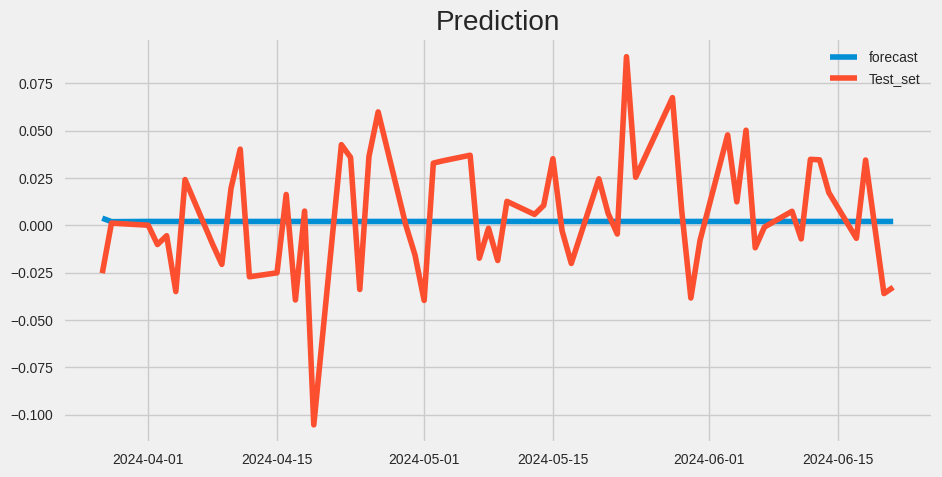

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(forecast)
plt.plot(test)
plt.legend(['forecast', 'Test_set'])
plt.title('Prediction')
plt.show()